# A few observations on Random Walks

### Purpose
The purpose of this notebook is to point out a few observations regarding random walks and how the number of directions available to each random walk influences the distance distribution. This is done purely out of curiosity and has no academic importance (or any kind of importance on that matter).


### What is a Random Walk?

A random walker, as defined by FIRST CITATION, is "a random process which describes a path including a succession of random steps in the mathematical space". 


### Where are Random Walks used?

Random Walks are being used in PageRank search algorithm, as described in SECOND CITATION, in Collaborative Filtering (FIRST CITATION PAGE 7), 
in predicting stock exchange markets(THIRD CITATION) and many more.



### Software approach

The python script used to simulate random walks involves two classes: Point and RandomWalk, and a function for generating equidistant directions called generate_directions.

The Point class models a point in a 2D cartesian system. It is also used as for representing the size as well as the direction of a step. 

In [37]:
import math
import numbers

class Point:
    """class for modelling a point"""

    def __init__(self, x=0., y=0. ):
        if isinstance(x, numbers.Number) is False or isinstance(y, numbers.Number) is False:
            raise ValueError("Arguments must be numeric")
        self.x = x
        self.y = y

        self.distance_method = {"euclid": lambda self, other_point: math.sqrt(
            (self.x - other_point.x) ** 2 + (self.y - other_point.y) ** 2),
                                "manhattan": lambda self, other_point: abs(self.x - other_point.x) + abs(
                                    self.y - other_point.y),
                                "minkowski": lambda self, other_point, p: (abs(self.x - other_point.x)**p +
                                                                          abs(self.y-other_point.y)**p)**(1/p)
        }
        self.distance_method_selected = "euclid"

    def __str__(self):
        return "x: " + str(self.x) + " y: " + str(self.y)

    def __add__(self, other_point):
        r = Point()
        r.x = self.x + other_point.x
        r.y = self.y + other_point.y
        return r

    def from_polar(self, r, t):
        self.x = r*math.cos(t)
        self.y = r*math.sin(t)

    def add_distance_method(self, name, function):
        self.distance_method[name] = function

    def get_distance_method(self):
        return self.distance_method_selected

    def get_distance_methods(self):
        return self.distance_method

    def set_distance_method(self, method):
        if method in self.distance_method:
            self.distance_method_selected = method
        else:
            raise ValueError("No such distance method exists")

    def distance(self, other_point):
        return self.distance_method[self.distance_method_selected](self, other_point)



The RandomWalk class models a random walk. It has a list of directions to choose from as well as a starting point and a current point class variables. The random method used to select a random direction can be changed as well. 

In [38]:
import random
#from point import Point


class RandomWalk:
    """class for simulating random walks"""

    def __init__(self, starting_point=Point(0.0, 0.0),
                 directions=[Point(0.0, 1.0), Point(0.0, -1.0), Point(1.0, 0.0), Point(-1.0, 0.0)]):
        """init random walk with (x, y) = (0, 0) as starting point
        and directions as [(0, 1) north, (0, -1) south, (1, 0) east, (-1, 0) west]"""
        if isinstance(starting_point, Point) is False:
            raise ValueError("Starting point must be of Point type")
        if all(isinstance(t, Point) for t in directions) is False:
            raise ValueError("All directions must be of Point type")

        self.starting_point = starting_point
        self.current_point = starting_point
        self.directions = directions
        self.random_method = random.choice

    def set_directions(self, directions):
        if all(isinstance(t, Point) for t in directions) is False:
            raise ValueError("All directions must be of Point type")
        self.directions = directions

    def set_random_method(self, met):
        self.random_method = met

    def __take_step(self):
        """private method for taking a step in a random direction"""
        self.current_point = self.current_point + self.random_method(self.directions)

    def take_steps(self, steps):
        """simulates taking multiple steps"""
        for _ in range(steps):
            self.__take_step()

    def distance_from_starting_point(self):
        """returns distance from starting point to current position"""
        return self.starting_point.distance(self.current_point)

    def reset(self):
        """sets the current position to the starting position"""
        self.current_point = self.starting_point

    def set_distance_method(self, method):
        self.starting_point.set_distance_method(method)
        self.current_point.set_distance_method(method)

    def walk(self, number_of_steps):
        """simulates taking  steps"""
        if number_of_steps < 0:
            raise ValueError("Number of steps < 0 not allowed")
        for i in range(number_of_steps):
            self.__take_step()
        return self.distance_from_starting_point()

The generate_directions function generates a list of equidistant directions from two parameters, the length of a step and the angle between directions

In [39]:
def generate_directions(r, n):
    increment = 360 / n
    current_angle = increment
    directions = []
    # using 360.1 instead of 360 to avoid rounding errors
    while current_angle <= 360.1:
        directions.append(Point(r, math.radians(current_angle), cartesian=False))
        current_angle = current_angle + increment
    return directions

### The script

For easier use the script has been turned into a function.

In [92]:
import matplotlib.pyplot as plt
from random_walk import generate_directions, RandomWalk

def report(number_of_directions = [3, 36], number_of_random_walks = 1000, number_of_steps = 10):
    walkers = [RandomWalk() for _ in range(number_of_random_walks)]
    for no_directions in number_of_directions:
        plt.figure(1)
        directions = generate_directions(1, no_directions)
        for walker in walkers:
            walker.reset()
            walker.set_directions(directions)
            walker.take_steps(number_of_steps)
        
        distances = [walker.distance_from_starting_point() for walker in walkers]
        walker_pos = [walker.current_point for walker in walkers]

        plt.hist(distances, bins=50, alpha=0.5, label=str(no_directions) + " directions")
        plt.figure(2)
        plt.scatter([p.x for p in walker_pos], [p.y for p in walker_pos], alpha=0.5, label=str(no_directions)
                                                                                           + " directions")

    plt.figure(1)
    plt.title("Distributions of random walks based on the number of directions (number of random walks: " 
              + str(number_of_random_walks) +", number of steps: " + str(number_of_steps) + ")")
    plt.xlabel("Distance from starting point")
    plt.ylabel("Count")
    plt.legend(loc='upper right')

    plt.figure(2)
    plt.title("Scatter plot of final positions (number of random walks: " 
              + str(number_of_random_walks) +", number of steps: " + str(number_of_steps) + ")")
    plt.legend(loc='upper right')
    plt.xlabel("x")
    plt.ylabel("y")

    plt.show()
    



### Parameters

Below are the parameters used in modelling the random walks:
    number_of_directions - python list containing the number of directions for random walks
    number_of_random_walks - number of random walks
    number_of_steps - number of steps

In [87]:
number_of_directions = [4, 8]
number_of_random_walks = 250
number_of_steps = 10

### Observations

An interesting observation is that the distribution of distance is different when the number of directions is different and the number of steps taken is small, even though all random walks have the same number of steps and the steps have the same length.

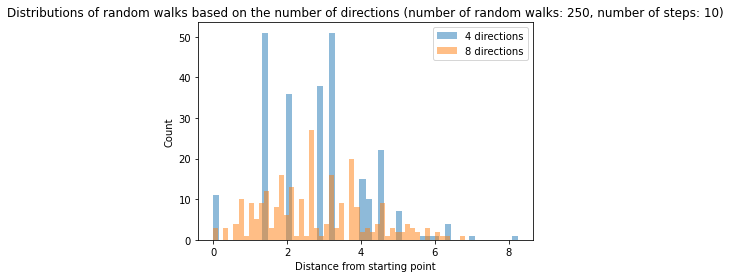

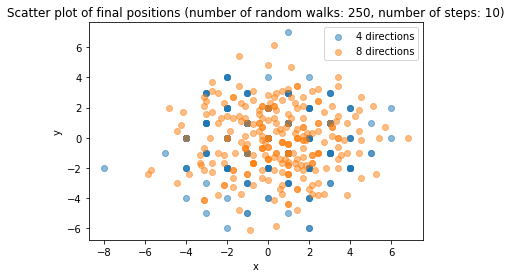

In [93]:
report(number_of_directions=number_of_directions, number_of_random_walks=number_of_random_walks, number_of_steps=10)

But they begin to resemble each other as the number of steps increases.

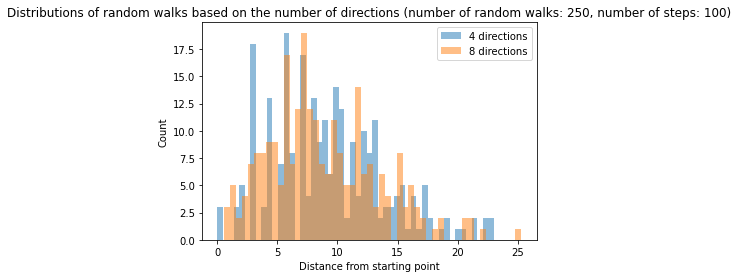

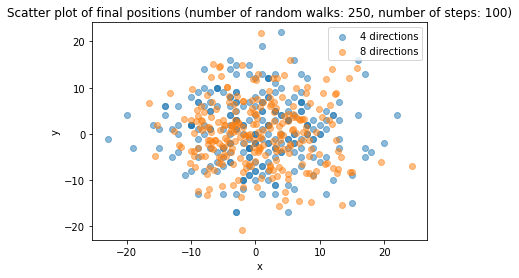

In [94]:
report(number_of_directions=number_of_directions, number_of_random_walks=number_of_random_walks, number_of_steps=100)

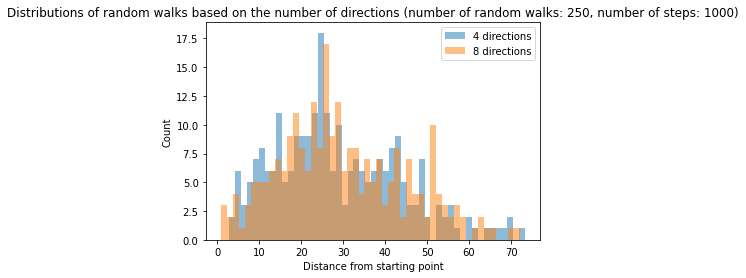

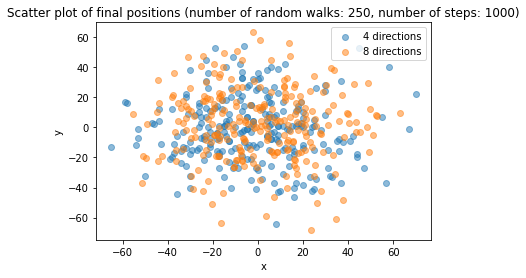

In [95]:
report(number_of_directions=number_of_directions, number_of_random_walks=number_of_random_walks, number_of_steps=1000)

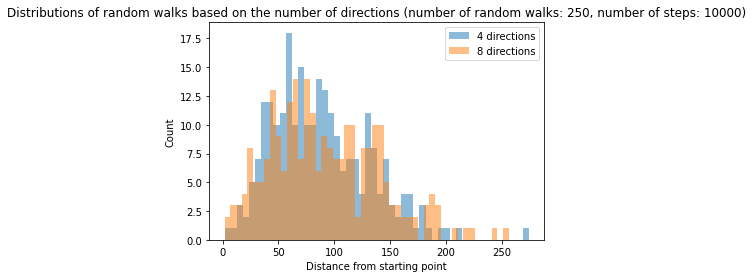

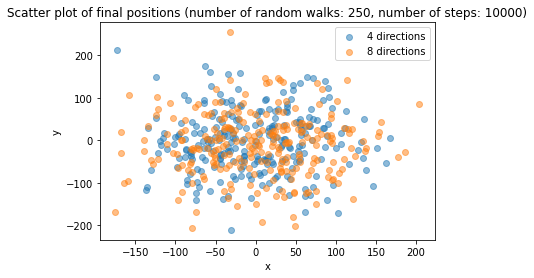

In [96]:
report(number_of_directions=number_of_directions, number_of_random_walks=number_of_random_walks, number_of_steps=10000)

A similar situation occurs when the number of random walks increases, everything else remaining constant.

In [97]:
number_of_directions = [4, 8]
number_of_random_walks = 10
number_of_steps = 100

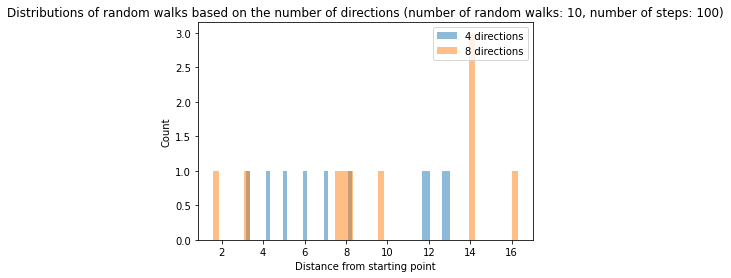

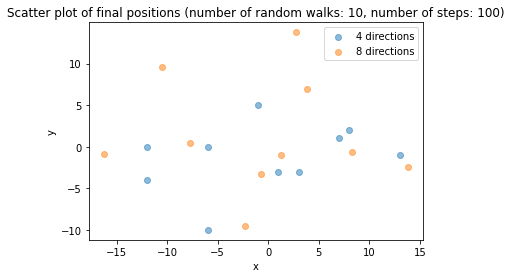

In [98]:
report(number_of_directions=number_of_directions, number_of_random_walks=10, number_of_steps=number_of_steps)

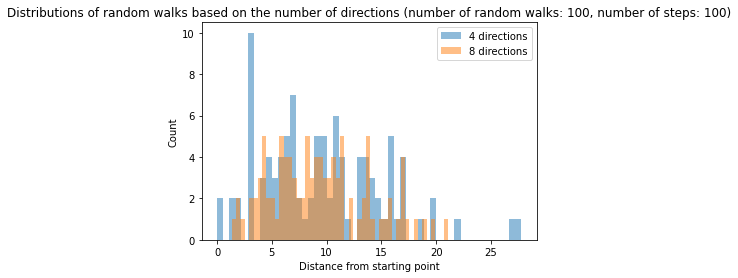

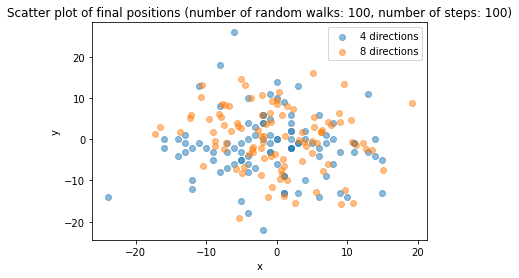

In [99]:
report(number_of_directions=number_of_directions, number_of_random_walks=100, number_of_steps=number_of_steps)

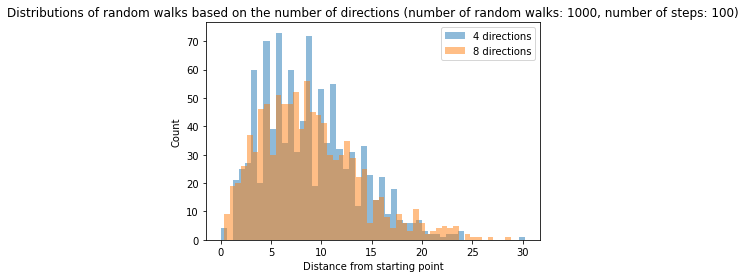

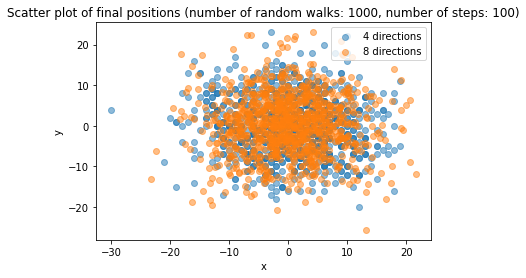

In [100]:
report(number_of_directions=number_of_directions, number_of_random_walks=1000, number_of_steps=number_of_steps)

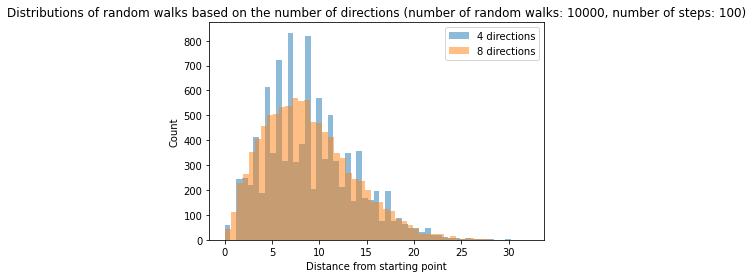

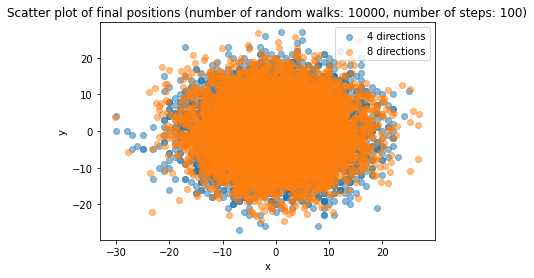

In [101]:
report(number_of_directions=number_of_directions, number_of_random_walks=10000, number_of_steps=number_of_steps)

When everything else is constant, the number of directions influences the distance distribution.

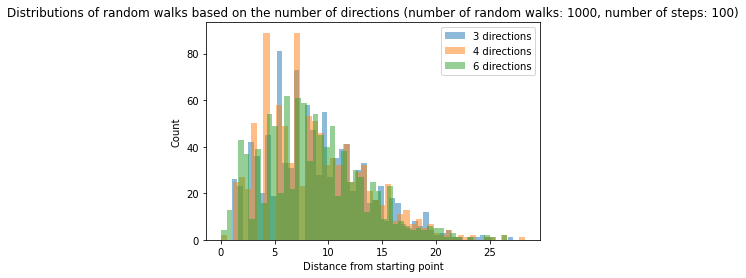

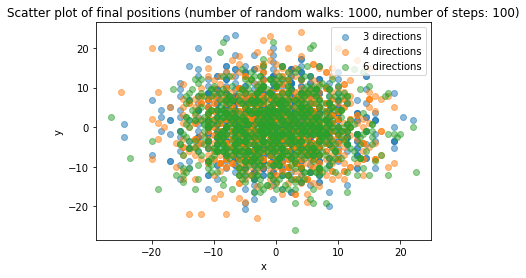

In [122]:
number_of_directions = [3,4,6]
report(number_of_directions=number_of_directions, number_of_random_walks=1000, number_of_steps=100)

Although this influence is not strong when the number of directions is large.

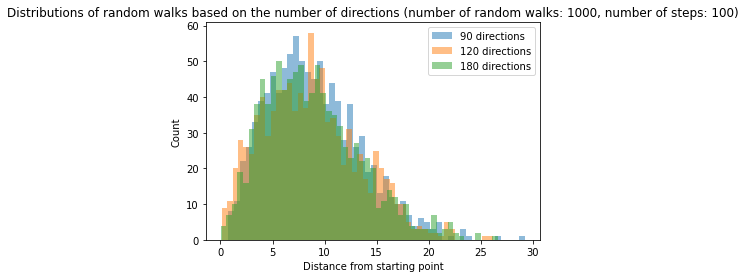

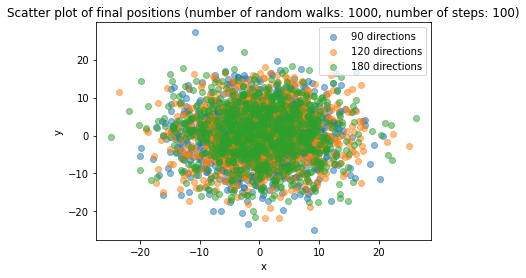

In [123]:
number_of_directions = [90, 120, 180]
report(number_of_directions=number_of_directions, number_of_random_walks=1000, number_of_steps=100)

### Playground

In [ ]:
number_of_directions = [4, 8]
number_of_random_walks = 10
number_of_steps = 100

report(number_of_directions=number_of_directions, number_of_random_walks=10, number_of_steps=number_of_steps)

CITATIONS:
    FIRST CITATION Xia, Feng & Liu, Jiaying & Nie, Hansong & Fu, Yonghao & Wan, Liangtian & Kong, Xiangjie. (2019). Random Walks: A Review of Algorithms and Applications. IEEE Transactions on Emerging Topics in Computational Intelligence. PP. 1-13. 10.1109/TETCI.2019.2952908.
    SECOND CITATION PageRank and random walks on graphs, Fan Chung and Wenbo Zhao, University of California, San Diego, La Jolla, CA 92093, US,{fan,pedu,w3zhao}@ucsd.edu
    THIRD CITATION Random Walks in Stock-Market Prices By EUGENE F. FAMA
    